# <img src="https://marcello-sega.github.io/pytim/_static/logo.png" alt="logo" style="width: 50px;display: inline-block;"/>  An introduction to pytim  

This notebook goes through a basic example of the usage of Pytim, and assumes that you already have a working Pytim package. The ITIM class will be used to analyze the layers of a macroscopically flat water/vapour interface. 

### 1. Importing the main modules

Pytim relies on [MDAnalysis](http://mdanalysis.org) to read different trajectory/topology/configuration formats. In this notebook we will use ony some basic functionality of MDAnalysis: you might want to become more familiar with it to perform more complex analysis. We also import `numpy` as most MDAnalysis objects can be accessed as numpy arrays.

In [1]:
import MDAnalysis as mda
import numpy as np

the next module we want to import is `pytim` itself. This loads (among other things) the [`ITIM`](https://marcello-sega.github.io/pytim/ITIM.html), [`GITIM`](https://marcello-sega.github.io/pytim/GITIM.html) and [`WillardChandler`](https://marcello-sega.github.io/pytim/WillardChancler.html) classes as well as the [`observables`](https://marcello-sega.github.io/pytim/observables.html) and [`utilities`](https://marcello-sega.github.io/pytim/utilities.html) modules.

In [2]:
import pytim

Pytim comes with a set of configurations/trajectories for a number of simple systems, meant for testing purposes. They can be accessed from the `pytim.datafiles` module, so let's load all of them:

In [3]:
from pytim.datafiles import *

Let's see which configuration files are available:

In [4]:
print pytim_data.config

['WATER_XYZ', 'WATERSMALL_GRO', 'MICELLE_PDB', 'WATER_GRO', 'WATER_PDB']


These are the names of variables pointing to the actual files in the distribution. 
Let's load the water configuration file:

In [5]:
u = mda.Universe(WATER_PDB)

Let's now figure out what's in this file:

In [6]:
print u
print len(u.residues)," residues of type:",
print np.unique(u.atoms.resnames)
print "The atoms in the system are of type:",
print np.unique(u.atoms.names)

<Universe with 12000 atoms>
4000  residues of type: ['SOL']
The atoms in the system are of type: ['H' 'O']


Now we would like to visulalize the strcutre in this notebook. A very convenient way is to use the `py3Dmol` module. To install it you can simply do:

    pip install --user py3Dmol

In [7]:
import py3Dmol

In [8]:
def genview(pdb,shift):
    view = py3Dmol.view()
    view.addModel(pdb,'pdb',{'keepH':'True'})
    view.setStyle({'sphere':{}})
    view.zoomTo()
    view.rotate(90,"y");
    view.translate(shift,0)
    view.zoom(2)
    return view


In [9]:
f=open(WATER_PDB)
pdb=f.read()
#print pdb

In [19]:
view = genview(pdb,-180)
view.show()

In [20]:
view.png()

Good, one can see that the system crosses the PBCs. 
Let's initialize an ITIM interface. Let's check first what are the default arguments:

In [21]:
help(pytim.ITIM.__init__)

Help on method __init__ in module pytim.itim:

__init__(self, universe, mesh=0.4, alpha=2.0, normal='guess', itim_group=None, radii_dict=None, max_layers=1, cluster_cut=None, cluster_threshold_density=None, molecular=True, extra_cluster_groups=None, info=False, multiproc=True) unbound pytim.itim.ITIM method



You can get a full help with 

    help(pytim.ITIM)
    
For now, we assume we don't want anything fancy for this first test, so let's go witht the default arguments 

In [22]:
inter = pytim.ITIM(u)

That's it. Now our layers have been computed, let's see their composition:

In [23]:
print inter.layers

[[<AtomGroup with 780 atoms>]
 [<AtomGroup with 777 atoms>]]


This is a list of lists... the layers in the upper interface are:

In [24]:
print inter.layers[0]

[<AtomGroup with 780 atoms>]


In [25]:
inter.layers[0,0]

<AtomGroup with 780 atoms>

We can use these groups as any other `MDAnalysis` group, to perform simple or more complex operations. For example, we can easily check the distribution along the Z axis of the atoms in those layers:

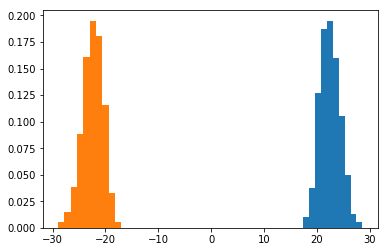

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
UPPER=0
LOWER=1
Z=2
plt.hist(inter.layers[UPPER,0].positions[::,Z], 10, normed=1)
plt.hist(inter.layers[LOWER,0].positions[::,Z], 10, normed=1)
plt.show()

Note that the layer distributions are roughly symmetric around the origin, while the configuration was crossing the PBCs. This is because,

If you are curious to see how the layers really look like, one can just save the PDB file with the information on the layer to which atoms belong to stored in the `beta` field. This can be read by VMD, for example (more on this on the VMD tutorial). In this notebook, we need to "trick" 3Dmol by changing the atom type of the atoms in the layers:

In [27]:
for atom in inter.layers[0,0]:
    atom.name="P"
for atom in inter.layers[1,0]:
    atom.name="P"

In [30]:
inter.writepdb('/tmp/layers.pdb')

f=open('/tmp/layers.pdb')
pdb=f.read()
view = genview(pdb,-180)

In [31]:
view.show()

In [32]:
view.png()

The surface molecules are now represented as orange spheres. 
Let's save again the interface, this time centering it. 

In [33]:
inter.writepdb('/tmp/layers2.pdb',centered='middle')

f=open('/tmp/layers2.pdb')
pdb=f.read()
view=genview(pdb,0)
view.zoomTo()


In [34]:
view.show()

In [35]:
view.png()